In [1]:
# Tasks
#  ● TimeSeries Exploratory Data Analysis
#  ● Next day/week/month sales
#  ● Specific customer purchases

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
 #pip install scikit-learn

In [4]:
data = pd.read_csv('COFFEE_SALES.csv')
data

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [5]:
data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [6]:
data.duplicated().sum()

0

# Payment mode

([<matplotlib.patches.Wedge at 0x245312e95b0>,
 [Text(-1.0666744161895672, 0.2687111643505832, 'card'),
  Text(1.0666743910310077, -0.26871126421984853, 'cash')],
 [Text(-0.5818224088306729, 0.14656972600940898, '92.1%'),
  Text(0.5818223951078223, -0.1465697804835537, '7.9%')])

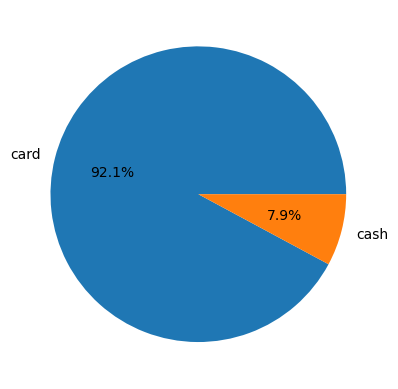

In [123]:
payment = data['cash_type'].value_counts()

plt.pie(payment,labels = payment.index,autopct = '%1.1f%%')


In [9]:
data['cash_type'].value_counts()

cash_type
card    1044
cash      89
Name: count, dtype: int64

In [10]:
data['coffee_name'].value_counts()

coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64

# Sales by Product

In [31]:
product_sales = data.groupby('coffee_name')['money'].sum().reset_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1860\3120184439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='money', y='coffee_name', data=product_sales, palette='magma')


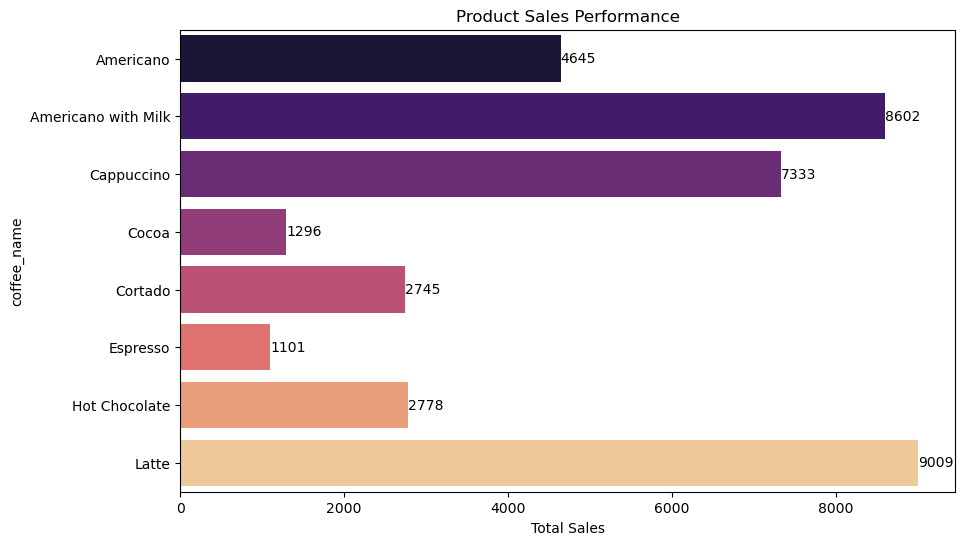

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='money', y='coffee_name', data=product_sales, palette='magma')

#Adding data labels
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge')  # '%.0f' for integer labels

plt.title('Product Sales Performance')
plt.xlabel('Total Sales')
plt.ylabel('coffee_name')
plt.show()

In [35]:
#monthly sales
data.head(5)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [167]:
data['month']=pd.to_datetime(data['date']).dt.strftime('%B')


In [169]:
data['month']

0       March
1       March
2       March
3       March
4       March
        ...  
1128     July
1129     July
1130     July
1131     July
1132     July
Name: month, Length: 1133, dtype: object

In [171]:
monthly_sales = data.groupby(['coffee_name','month']).count()['date'].reset_index().pivot(index='month',columns ='coffee_name',values='date').reset_index()

In [173]:
monthly_sales = monthly_sales.rename(columns={'coffee_name':'Sr.no'})
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,April,35,42,43,6,19,7,13,31
1,July,36,65,32,9,14,14,11,56
2,June,14,69,46,5,19,10,14,50
3,March,36,34,20,6,30,10,22,48
4,May,48,58,55,9,17,8,14,58


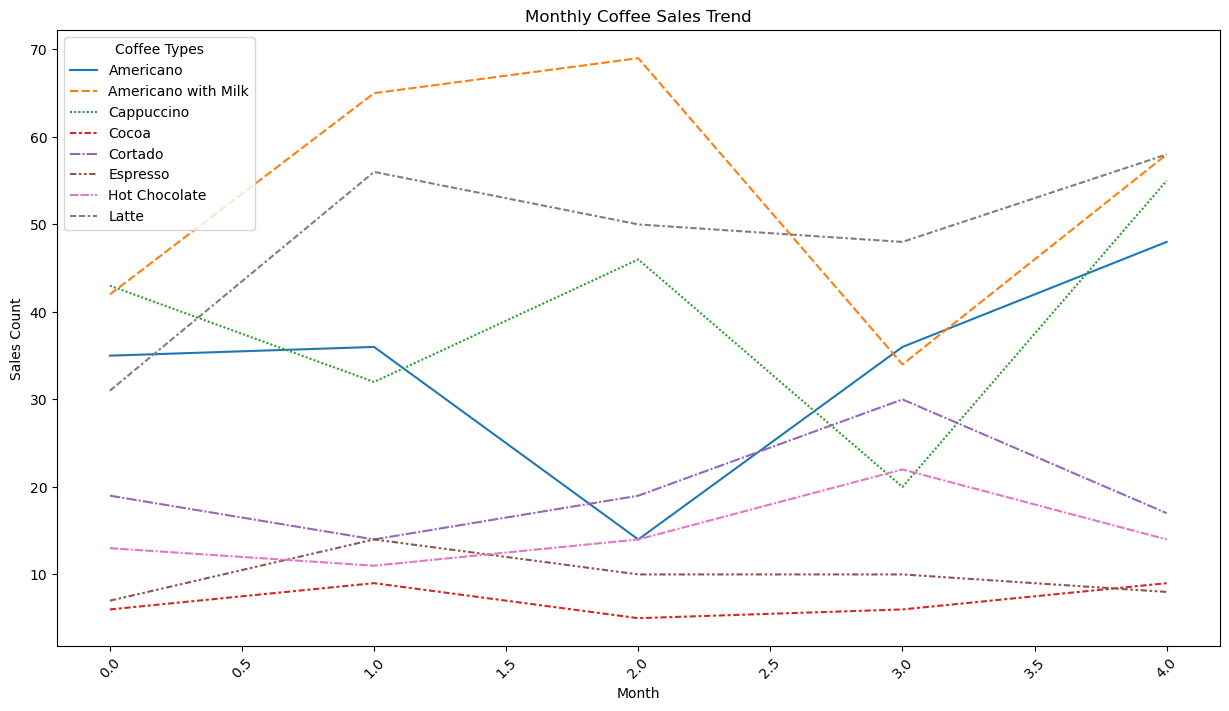

In [199]:
plt.figure(figsize=(15, 8))
sns.lineplot(monthly_sales.iloc[:,1:])

plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.title('Monthly Coffee Sales Trend')
plt.legend(title="Coffee Types")
plt.xticks(rotation=45)  # Rotate for better visibility
plt.show()

In [47]:
#monthly Sales of Americano with milk is much higher

In [49]:
data.head(15)

,date,datetime,cash_type,card,money,coffee_name,month
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk,3
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate,3
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk,3
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa,3
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk,3


# Weekly Sales

In [52]:
#weekly sales
data['day']=pd.to_datetime(data['date']).dt.strftime('%w')

In [54]:
data['day']

0       5
1       5
2       5
3       5
4       5
       ..
1128    3
1129    3
1130    3
1131    3
1132    3
Name: day, Length: 1133, dtype: object

In [56]:
data

,date,datetime,cash_type,card,money,coffee_name,month,day
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,3,5
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,5
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,5
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,3,5
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,3,5
...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,7,3
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,7,3
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,7,3
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,7,3


In [58]:
weekly_sales = data.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})

In [60]:
weekly_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


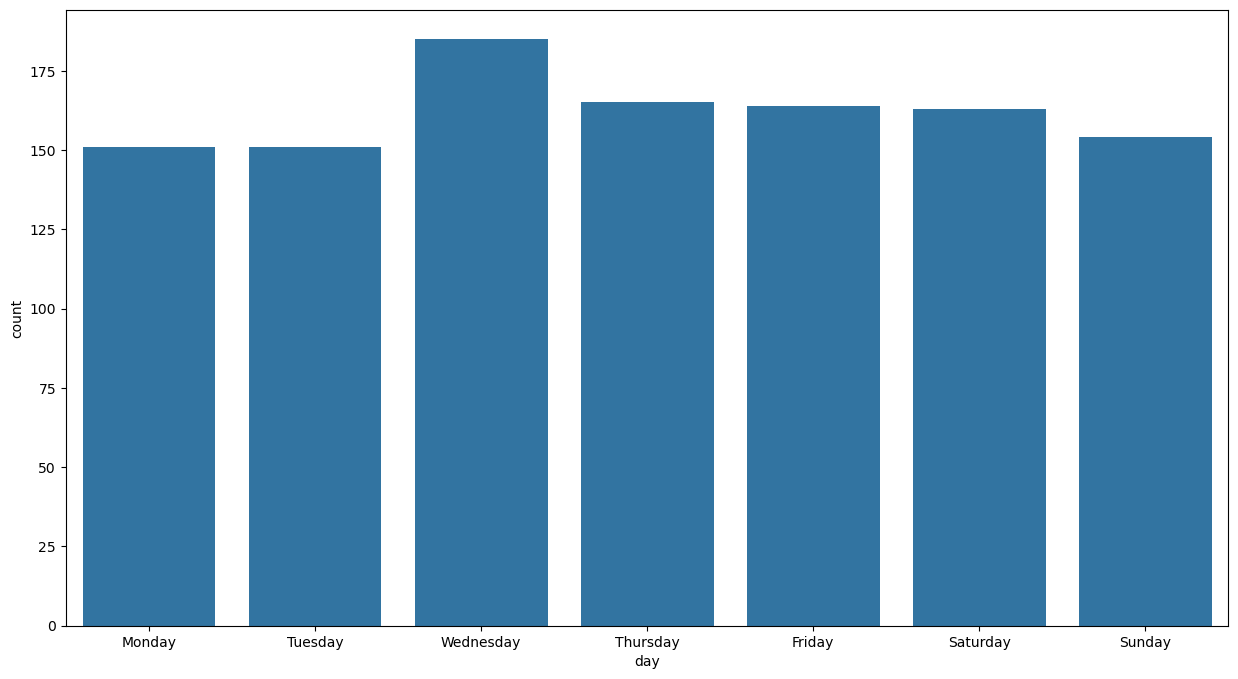

In [62]:
import calendar
calendar.setfirstweekday(calendar.SUNDAY)
days_names=[calendar.day_name[i] for i in range(7)]
plt.figure(figsize =(15,8))
sns.barplot(data = weekly_sales,x='day',y='count')
plt.xticks(range(len(weekly_sales['day'])),days_names)
plt.show()

In [64]:
days_names

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [215]:
data['week'] = data['date'].dt.strftime('%U')
data['week']

0       08
1       08
2       08
3       08
4       08
        ..
1128    30
1129    30
1130    30
1131    30
1132    30
Name: week, Length: 1133, dtype: object

In [221]:
# data['week'] = data['date'].dt.strftime('%U')
weekly_sales_coffee_type = data.groupby(['day', 'coffee_name']).size().reset_index(name='sales_count')
weekly_sales_coffee_type 

,day,coffee_name,sales_count
0,0,Americano,17
1,0,Americano with Milk,34
2,0,Cappuccino,28
3,0,Cocoa,3
4,0,Cortado,14
5,0,Espresso,8
6,0,Hot Chocolate,14
7,0,Latte,33
8,1,Americano,37
9,1,Americano with Milk,32


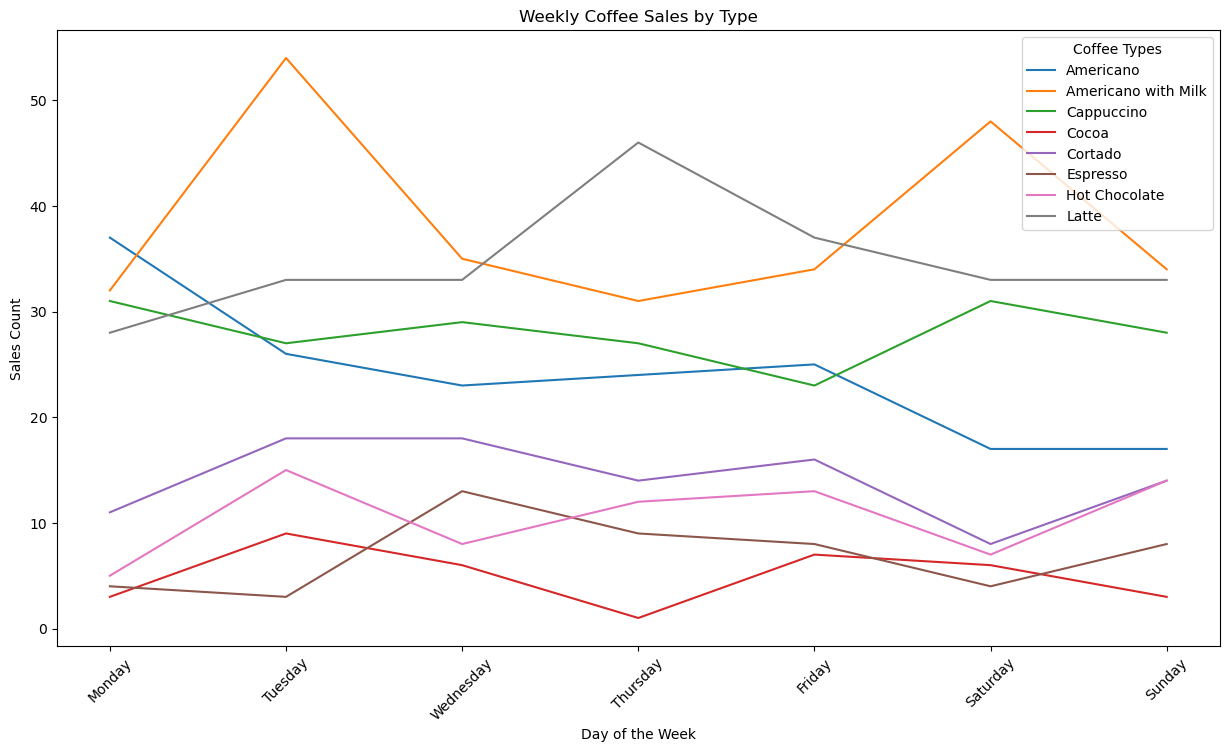

In [227]:

import calendar
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day_name()

weekly_sales_coffee_type = data.groupby(['day', 'coffee_name']).size().reset_index(name='sales_count')
day_order = list(calendar.day_name)  
weekly_sales_coffee_type['day'] = pd.Categorical(weekly_sales_coffee_type['day'], categories=day_order, ordered=True)

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(data=weekly_sales_coffee_type, x='day', y='sales_count', hue='coffee_name')

plt.xlabel('Day of the Week')
plt.ylabel('Sales Count')
plt.title('Weekly Coffee Sales by Type')
plt.xticks(rotation=45)
plt.legend(title="Coffee Types")
plt.show()


# daily sales

In [67]:
daily_sales = data.groupby(['coffee_name','date']).count()['datetime'].reset_index().pivot(index='date',columns='coffee_name',values='datetime').reset_index()

In [69]:
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,NaN,1.0,NaN,NaN,3.0,2.0
1,2024-03-02,3.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
2,2024-03-03,1.0,2.0,NaN,1.0,2.0,NaN,2.0,2.0
3,2024-03-04,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2.0
4,2024-03-05,NaN,NaN,NaN,1.0,1.0,NaN,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,NaN,5.0,4.0,NaN,NaN,2.0,NaN,2.0
146,2024-07-28,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,NaN,NaN,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,NaN,3.0,2.0,NaN,3.0


In [71]:
daily_sales=daily_sales.fillna(0)

In [73]:
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


In [75]:
daily_sales.iloc[:,1:].describe()

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.126667,1.786667,1.306667,0.233333,0.660000,0.326667,0.493333,1.620000
std,1.216755,1.751650,1.360747,0.483509,0.932846,0.660452,0.888001,1.359382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,5.000000,12.000000,9.000000,2.000000,4.000000,4.000000,4.000000,7.000000


In [77]:
daily_revenue = daily_sales.iloc[:,1:].describe().loc[['min','max'],:]
daily_revenue

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5.0,12.0,9.0,2.0,4.0,4.0,4.0,7.0


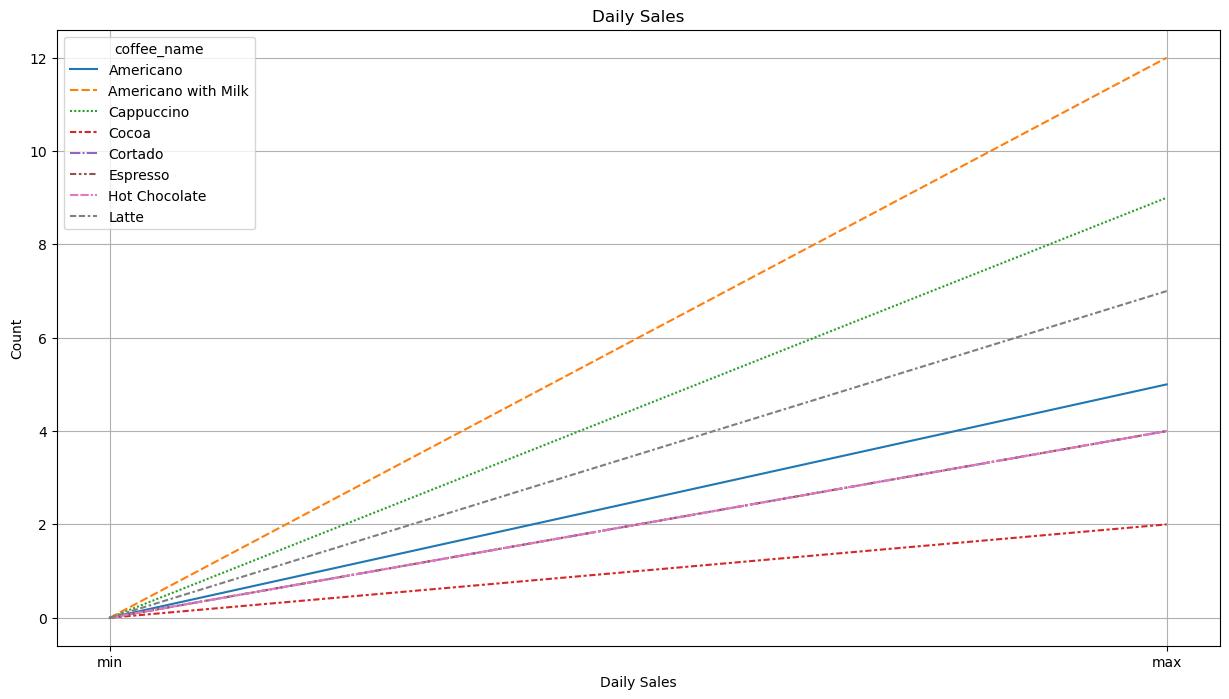

In [79]:
plt.figure(figsize = (15,8))
sns.lineplot(data = daily_revenue)
plt.xlabel('Daily Sales')
plt.ylabel('Count')
plt.title('Daily Sales')
plt.grid(True)
plt.show()

In [84]:
daily_total_sales= data.groupby(['date','day'])['money'].sum().reset_index()

avg_weekday_sales= daily_total_sales.groupby('day')['money'].mean().reset_index()

Text(0, 0.5, 'Average sales amount per day ')

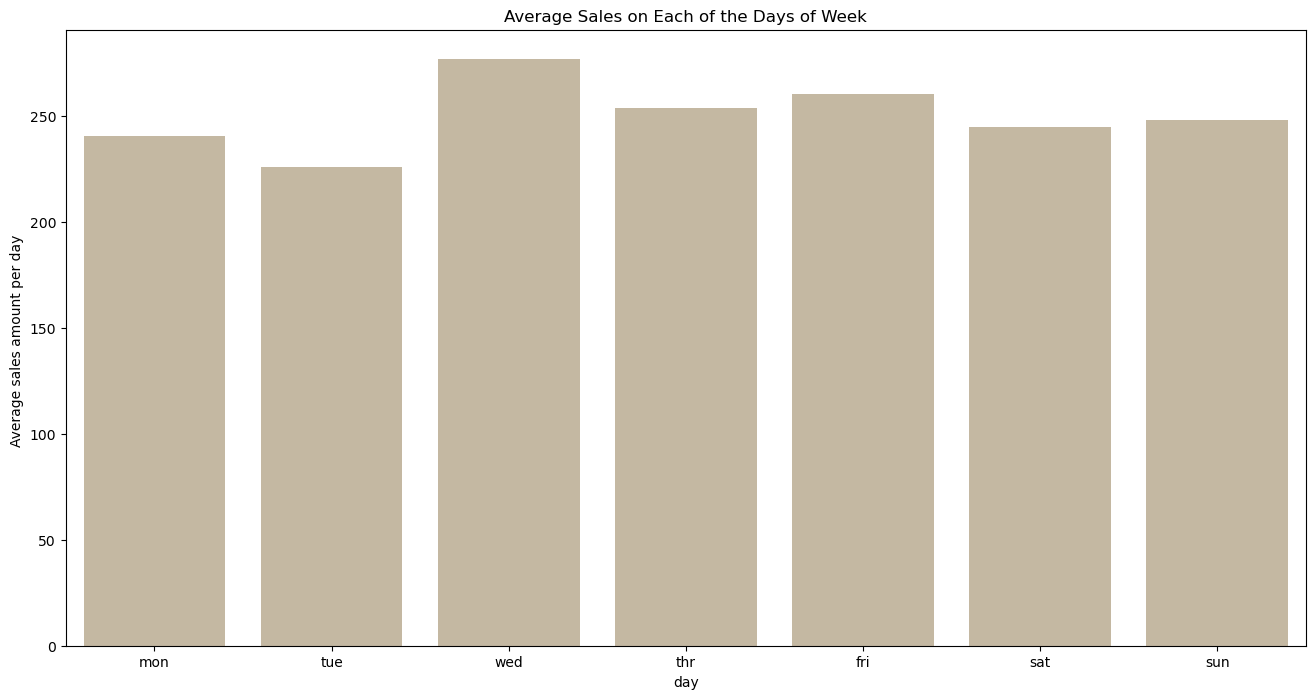

In [125]:
plt.figure(figsize=(16,8))

sns.barplot(data= avg_weekday_sales, x='day', y='money', color='#CABA9C')

plt.xticks([0,1,2,3,4,5,6],labels=['mon','tue','wed','thr','fri','sat','sun'])
plt.title('Average Sales on Each of the Days of Week')
plt.ylabel('Average sales amount per day ')


# Hourly Sales

In [88]:
data['hour'] = pd.to_datetime(data['datetime']).dt.hour

In [90]:
data['hour']

0       10
1       12
2       12
3       13
4       13
        ..
1128    20
1129    20
1130    21
1131    21
1132    21
Name: hour, Length: 1133, dtype: int32

In [92]:
#hourly sales
hourly_sales = data.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})

In [94]:
hourly_sales

,hour,count
0,7,13
1,8,44
2,9,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


Text(0.5, 0, 'Hours')

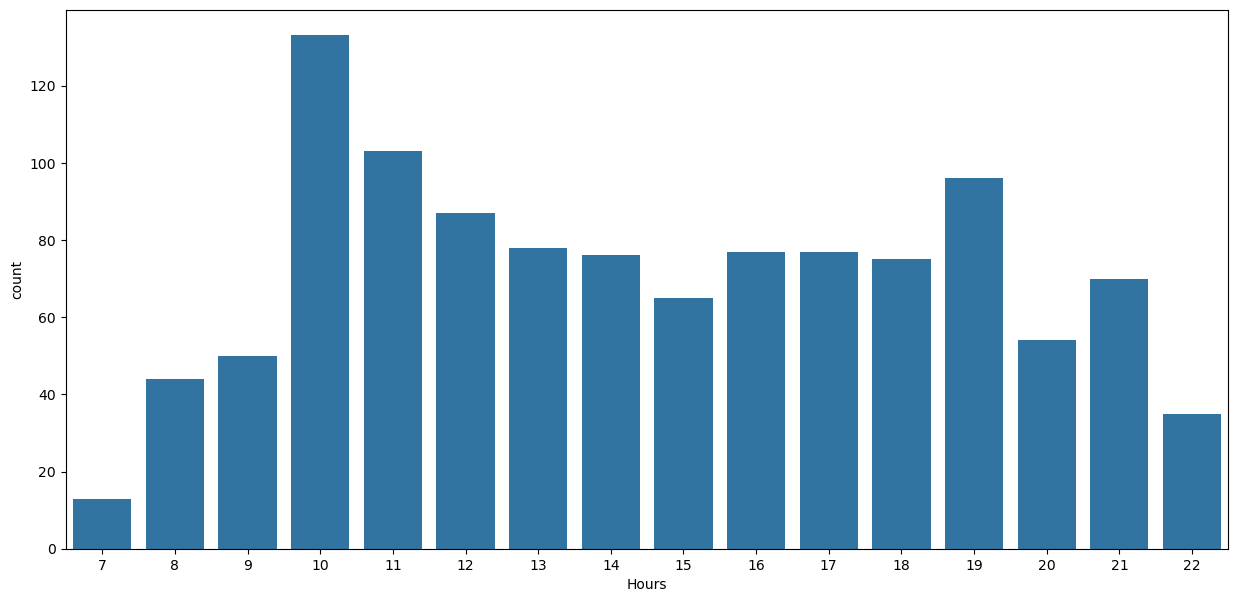

In [129]:
plt.figure(figsize=(15,7))
sns.barplot(data= hourly_sales,x = 'hour', y = 'count')
plt.xlabel('Hours')

In [98]:
#hourly sales by coffee
hourly_sales_by_coffee = data.groupby(['hour','coffee_name']).count()['date'].reset_index().pivot(index = 'hour',columns = 'coffee_name',values='date').reset_index()

In [100]:
hourly_sales_by_coffee.fillna(0)

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,7,5.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0
1,8,10.0,7.0,8.0,1.0,6.0,0.0,0.0,12.0
2,9,8.0,16.0,6.0,1.0,5.0,3.0,0.0,11.0
3,10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
4,11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0
5,12,14.0,26.0,15.0,3.0,7.0,6.0,3.0,13.0
6,13,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
7,14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
8,15,14.0,15.0,8.0,0.0,3.0,4.0,6.0,15.0
9,16,10.0,18.0,12.0,3.0,12.0,5.0,4.0,13.0


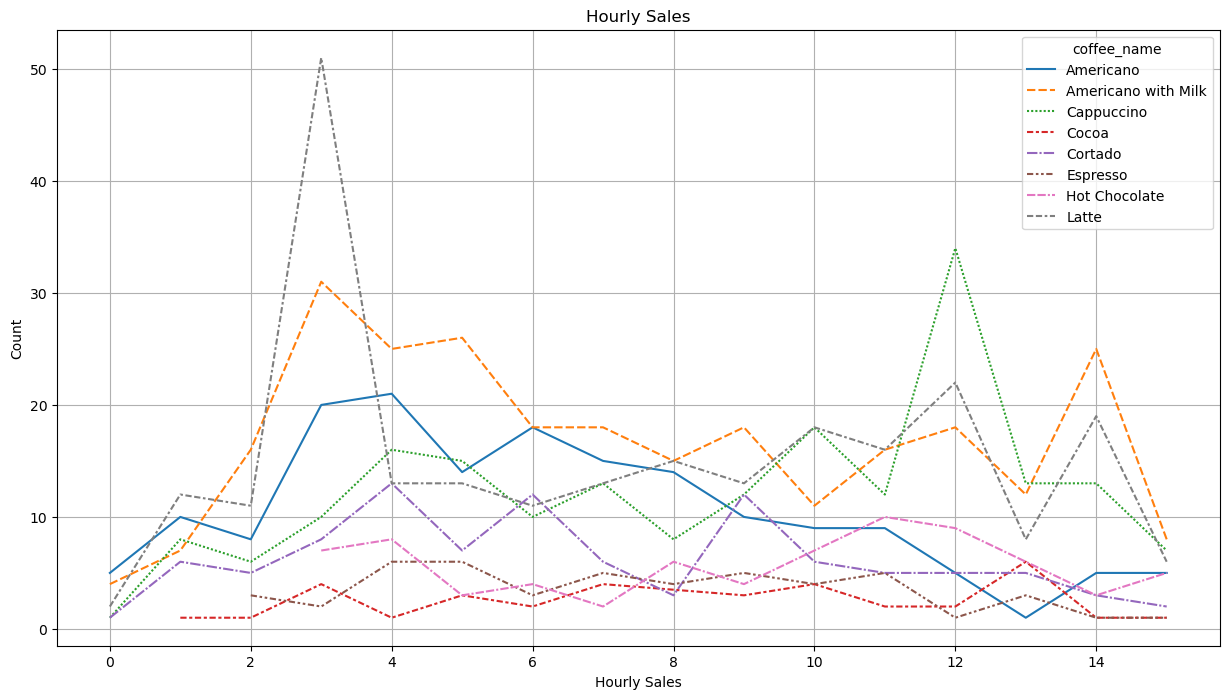

In [102]:
plt.figure(figsize = (15,8))
sns.lineplot(data = hourly_sales_by_coffee.iloc[:,1:])
plt.xlabel('Hourly Sales')
plt.ylabel('Count')
plt.title('Hourly Sales')
plt.grid(True)
plt.show()

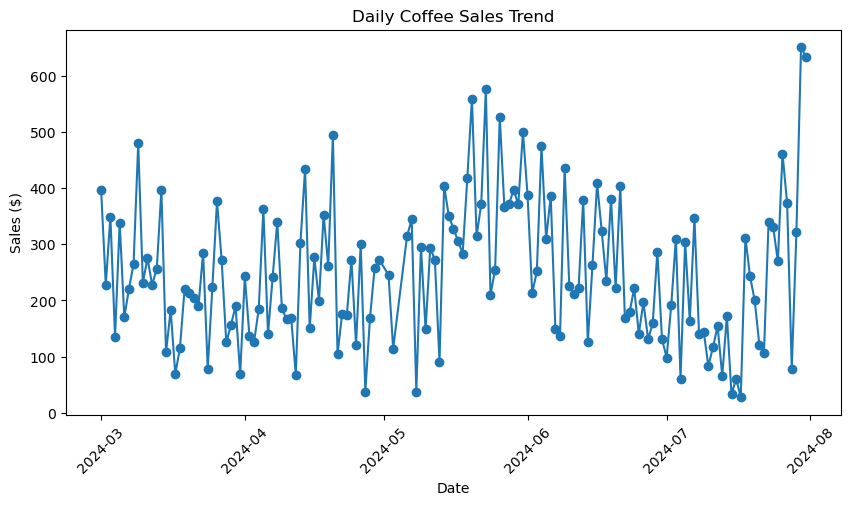

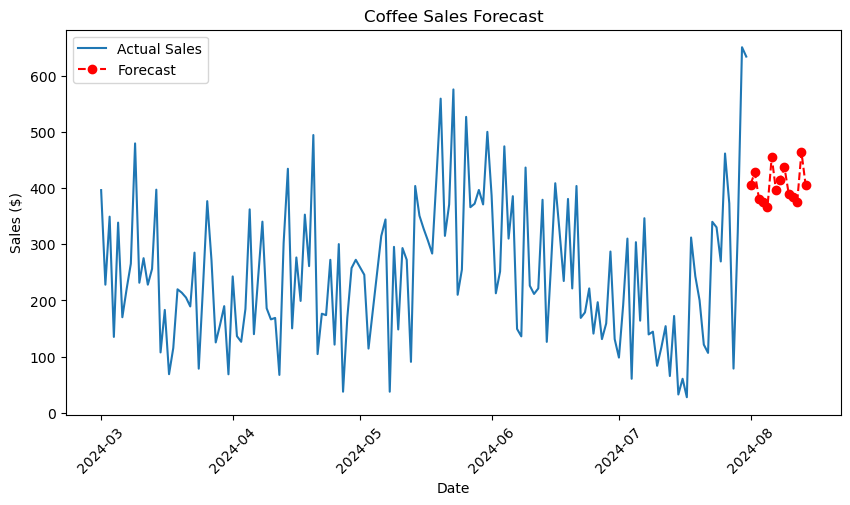

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv("COFFEE_SALES.csv")

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Aggregate sales by date
daily_sales = df.groupby("date")["money"].sum().reset_index()

# Plot the sales trend
plt.figure(figsize=(10, 5))
plt.plot(daily_sales["date"], daily_sales["money"], marker="o", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.title("Daily Coffee Sales Trend")
plt.xticks(rotation=45)
plt.show()

# Apply Holt-Winters Exponential Smoothing for forecasting
model = ExponentialSmoothing(daily_sales["money"], trend="add", seasonal="add", seasonal_periods=7)
fit = model.fit()

# Forecast the next 14 days
forecast = fit.forecast(14)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_sales["date"], daily_sales["money"], label="Actual Sales")
plt.plot(pd.date_range(daily_sales["date"].max() + pd.Timedelta(days=1), periods=14), forecast, label="Forecast", linestyle="--", marker="o", color="red")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.title("Coffee Sales Forecast")
plt.legend()
plt.xticks(rotation=45)
plt.show()
